# Complete Guide to Data Plotting

Before diving into this comprehensive guide on data plotting, I highly recommend checking out the [Complete Guide to Descriptive Stats](https://www.kaggle.com/code/matinmahmoudi/complete-guide-to-descriptive-stats-a-to-z). This tutorial provides a solid foundation in descriptive statistics, which will enhance your understanding and application of data visualization techniques discussed in this notebook.

## What Will You Learn?

In this guide, we will explore a variety of data visualization methods to help you effectively present and interpret your data. Here's what we'll cover:

### Visualizing Numerical Data
- **Histograms**: Learn how to create and interpret histograms to understand the distribution of your numerical data.
- **Box Plots**: Use box plots to visualize the spread and identify outliers in your numerical data.
- **Density Plots**: Discover how density plots can provide a smooth estimation of the distribution of your numerical data.

### Visualizing Categorical Data
- **Bar Charts**: Create bar charts to display the frequency of different categories in your data.
- **Pie Charts**: Use pie charts to represent the proportional distribution of categories.

### Exploring Relationships Between Variables
- **Correlation**: Understand how to compute and visualize correlation between numerical variables to identify linear relationships.
- **Scatter Plots**: Use scatter plots to explore the relationship between two numerical variables.
- **Hexagonal Binning and Contours**: Learn advanced techniques like hexagonal binning and contour plots to visualize the density of data points.
- **Pair Plots**: Create pair plots to examine relationships between multiple pairs of numerical variables simultaneously.

### Comparing Categorical and Numerical Data
- **Box Plots and Violin Plots**: Compare the distribution of numerical data across different categories using box plots and violin plots.

## Why This Guide?

- **Step-by-Step Tutorials**: Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning**: Engage with interactive code cells that allow you to see the effects of data visualization techniques in real-time.


### How to Use This Notebook

- **Run the Cells**: Follow along with the code examples by running the cells yourself. Modify the parameters to see how the results change.
- **Explore Further**: After completing the guided sections, try applying the methods to your own datasets to reinforce your learning.

Prepare to elevate your data visualization skills and transform your data into compelling visual stories!


# Visualizing Numerical Data


## Histograms

## What is a Histogram?

A histogram consists of contiguous (adjacent) bars. It groups data into bins or intervals, showing the frequency of data points within each bin. The height of each bar represents the number of data points that fall into that bin.

### Key Components:
- **Bins**: Intervals that divide the range of data.
- **Frequency**: The count of data points within each bin.
- **Bars**: Represent the frequency of data points within each bin.

## Relationship with Frequency Tables

A histogram is essentially a graphical representation of a frequency table. In a frequency table, numerical data is grouped into discrete intervals, or bins, and the frequency of data points within each bin is recorded. A histogram takes this tabular information and displays it visually, making it easier to understand the distribution of the data at a glance. This visual representation can reveal patterns, trends, and anomalies that might not be immediately apparent in a frequency table.

## Why Use Histograms?

- **Identify Data Distribution**: Histograms reveal the shape and spread of your data.
- **Detect Outliers**: Easily spot outliers that fall outside the common range.
- **Understand Skewness**: Determine whether data is left-skewed, right-skewed, or symmetrical.
- **Compare Distributions**: Compare different datasets or subsets of data.


## Seaborn `histplot`

[Seaborn `histplot` Documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)

The `histplot` function in Seaborn is a versatile tool for creating histograms with a variety of customization options. This function can be used to visualize the distribution of a single numerical variable or to compare distributions across different categories.

### Basic Syntax

```python

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data, **kwargs)
plt.show()
```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It can be a DataFrame, Series, array, or list.
- **`x`**: The name of the variable to be plotted on the x-axis. If `data` is a DataFrame, this should be the column name.
- **`bins`**: The number of bins (intervals) for the histogram. It can be an integer specifying the number of bins or a sequence defining the bin edges.
- **`binwidth`**: The width of each bin. If specified, `bins` will be ignored.
- **`binrange`**: A tuple specifying the lower and upper range of the bins. If not provided, the range is determined from the data.
- **`discrete`**: If `True`, treat `x` as a discrete variable. This is useful for integer data.
- **`stat`**: The statistic to compute (e.g., 'count', 'frequency', 'density', 'probability'). Default is 'count'.
- **`common_bins`**: If `True` and `multiple` is specified, use the same bins for all groups.
- **`common_norm`**: If `True` and `multiple` is specified, normalize the counts across all groups.
- **`multiple`**: Method for combining multiple distributions ('layer', 'dodge', 'stack', or 'fill').
- **`element`**: Plotting style of histogram elements ('bars' or 'step').
- **`fill`**: If `True`, fill the bars with color.
- **`color`**: The color of the bars.
- **`palette`**: The palette to use for coloring when multiple distributions are plotted.
- **`hue`**: Name of the variable in `data` for creating separate histograms based on different categories.
- **`weights`**: Array of weights for each data point, allowing for weighted histograms.
- **`kde`**: If `True`, plot a kernel density estimate along with the histogram.


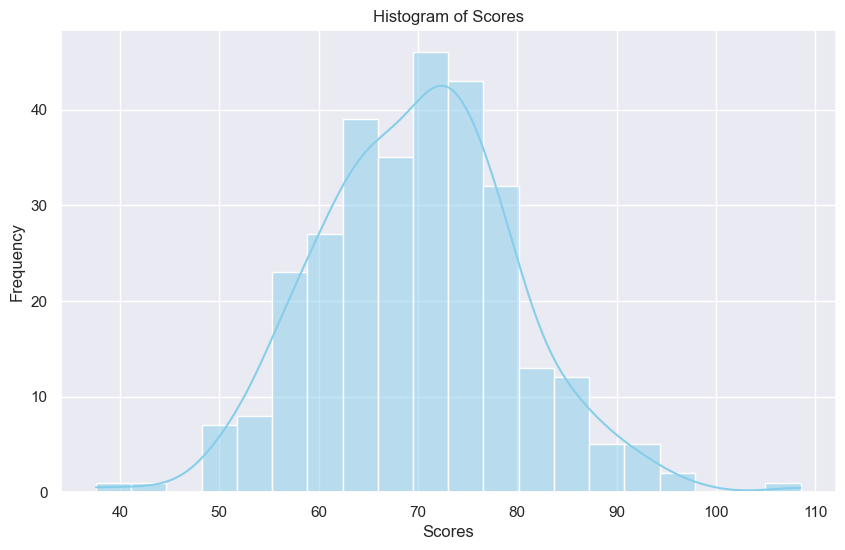

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Scores': np.random.normal(loc=70, scale=10, size=300)
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style='darkgrid')

# Create histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Scores',
    bins=20,           # Number of bins
    color='skyblue',   # Color of the bars
    kde=True           # Plot a kernel density estimate
)

# Add title and labels
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Show plot
plt.show()


## Box Plots

## What is a Box Plot?

A box plot, also known as a whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Box plots can also highlight outliers.

### Key Components:
- **Box**: Represents the interquartile range (IQR) from Q1 to Q3.
- **Whiskers**: Extend from the box to the minimum and maximum values within 1.5 * IQR from Q1 and Q3, respectively.
- **Median Line**: A line inside the box indicating the median (Q2).
- **Outliers**: Data points outside the whiskers.

## Relationship with Statistical Measures

A box plot provides a graphical summary of data, making it easy to see the central tendency, variability, and outliers. The box itself represents the middle 50% of the data, which is crucial for understanding the spread and central tendency. Whiskers extend to show the range, and any points outside the whiskers are considered outliers, indicating variability.

## Why Use Box Plots?

- **Compare Distributions**: Easily compare distributions between different groups or categories.
- **Identify Outliers**: Detect outliers and understand their impact on the data.
- **Visualize Spread**: See the spread and skewness of the data at a glance.
- **Summarize Data**: Provide a summary of data with key statistical measures.

## Seaborn `boxplot`

[Seaborn `boxplot` Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

The `boxplot` function in Seaborn is a powerful tool for creating box plots with a variety of customization options. This function can be used to visualize the distribution of a numerical variable across different categories.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data, **kwargs)
plt.show()
```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It can be a DataFrame, Series, array, or list.
- **`x`**: The name of the variable to be plotted on the x-axis.
- **`y`**: The name of the variable to be plotted on the y-axis.
- **`hue`**: Grouping variable that will produce boxes with different colors.
- **`order`**: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`width`**: Width of each box.
- **`dodge`**: When hue nesting is used, whether elements should be shifted along the categorical axis.
- **`fliersize`**: Size of the markers used to indicate outliers.


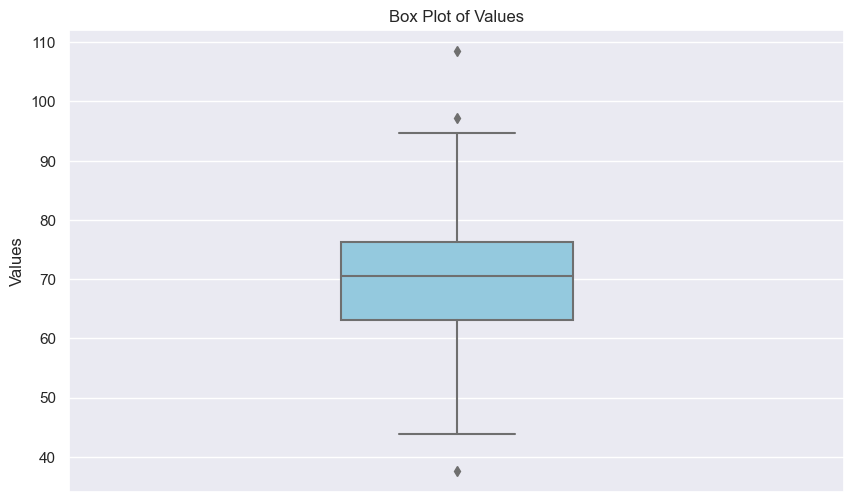

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Values': np.random.normal(loc=70, scale=10, size=300),
    'Values_1': np.random.normal(loc=70, scale=10, size=300)
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style='darkgrid')

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    y='Values',         # The name of the variable to be plotted on the y-axis
    width=0.3,          # Width of each box
    fliersize=5,        # Size of the markers used to indicate outliers
    color='skyblue'     # Color of the box
)

# Add title and labels
plt.title('Box Plot of Values')
plt.ylabel('Values')

# Show plot
plt.show()


## Density Plots

## What is a Density Plot?

A density plot, also known as a Kernel Density Estimate (KDE) plot, is a smooth curve that represents the distribution of a dataset. It is used to visualize the probability density of a continuous variable. Unlike histograms, density plots provide a smooth estimate of the data distribution, making it easier to identify patterns and trends.

### Key Components:
- **Density Curve**: A smooth curve representing the estimated probability density function of the data.
- **Bandwidth**: A parameter that controls the smoothness of the density curve. Smaller bandwidth values produce a more detailed plot, while larger values produce a smoother plot.

## Relationship with Histograms

While histograms represent the frequency of data points within bins, density plots provide a continuous estimation of the distribution. Density plots can be considered as a smoothed version of histograms, offering a clearer visualization of the data distribution.

## Why Use Density Plots?

- **Smooth Distribution**: Density plots provide a smooth representation of the data distribution.
- **Identify Patterns**: Easily identify patterns, peaks, and valleys in the data.
- **Compare Distributions**: Compare the distributions of different datasets or subsets of data.
- **Visualize Probabilities**: Visualize the probability density of a continuous variable.

## Seaborn `kdeplot`

[Seaborn `kdeplot` Documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

The `kdeplot` function in Seaborn is a powerful tool for creating density plots with a variety of customization options. This function can be used to visualize the probability density of a single numerical variable or to compare distributions across different categories.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data, **kwargs)
plt.show()

```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It can be a DataFrame, Series, array, or list.
- **`x`**: The name of the variable to be plotted on the x-axis.
- **`bw_adjust`**: Factor that adjusts the bandwidth of the kernel density estimate. Smaller values produce more detailed plots, while larger values produce smoother plots.
- **`hue`**: Grouping variable that will produce multiple density plots with different colors.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`shade`**: If `True`, shade the area under the density curve.
- **`cut`**: Number of standard deviations to extend the density curve beyond the data range.
- **`multiple`**: Method for drawing multiple densities ('layer', 'stack', 'fill').


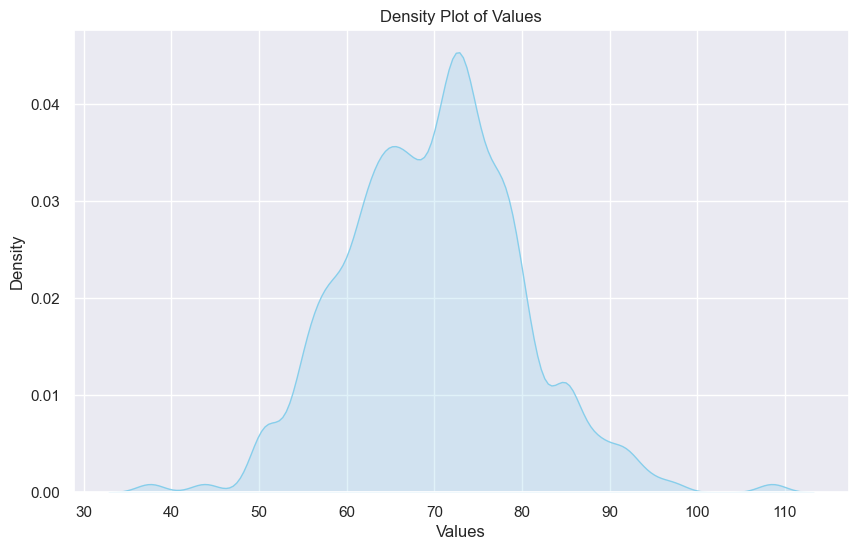

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Values': np.random.normal(loc=70, scale=10, size=300)
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style='darkgrid')

# Create density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='Values',        # The name of the variable to be plotted on the x-axis
    bw_adjust=0.5,     # Adjusts the bandwidth of the kernel density estimate
    shade=True,        # Shade the area under the density curve
    color='skyblue'    # Color of the density plot
)

# Add title and labels
plt.title('Density Plot of Values')
plt.xlabel('Values')
plt.ylabel('Density')

# Show plot
plt.show()


# Visualizing Categorical Data


## Bar Charts

## What is a Bar Chart?

A bar chart is a graphical representation of data where individual bars represent the frequency or value of different categories. The length or height of each bar is proportional to the value it represents. Bar charts are useful for comparing the quantities of different categories or groups.

## Relationship with Other Charts

Bar charts are similar to histograms but are used for categorical data instead of continuous data. They provide a clear and straightforward way to compare different categories.

## Why Use Bar Charts?

- **Compare Categories**: Easily compare the values of different categories.
- **Visualize Frequencies**: Show the frequency of occurrences in different categories.

## Seaborn `barplot`

[Seaborn `barplot` Documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

The `barplot` function in Seaborn is a powerful tool for creating bar charts with a variety of customization options. This function can be used to visualize the average value of a numerical variable for different categories.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data, **kwargs)
plt.show()

```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It can be a DataFrame, Series, array, or list.
- **`x`**: The name of the categorical variable to be plotted on the x-axis.
- **`y`**: The name of the numerical variable to be plotted on the y-axis.
- **`hue`**: Grouping variable that will produce bars with different colors.
- **`order`**: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`ci`**: Size of confidence intervals to draw around estimated values. If `None`, no bootstrapping is performed, and error bars are not drawn.


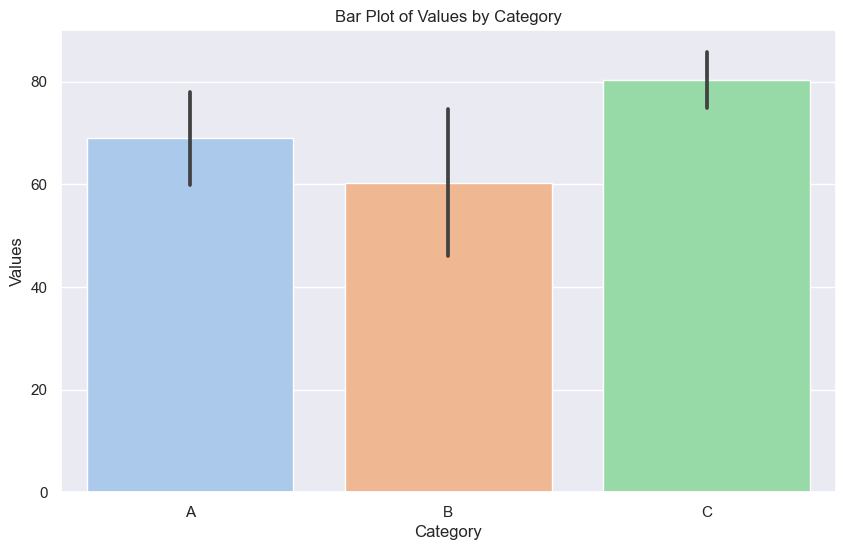

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Category': np.array(['A']*100+['B']*100+['C']*100),
    'Values': np.concatenate([
        np.random.normal(loc=70, scale=10, size=100),
        np.random.normal(loc=60, scale=15, size=100),
        np.random.normal(loc=80, scale=5, size=100)
    ])
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style='darkgrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Category',
    y='Values',
    palette='pastel',   # Color palette
    ci='sd'             # Show standard deviation as error bars
)

# Add title and labels
plt.title('Bar Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')

# Show plot
plt.show()


## Pie Charts

## What is a Pie Chart?

A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions. Each slice of the pie represents a category's contribution to the whole. Pie charts are useful for showing the relative sizes of parts of a whole.

## Relationship with Other Charts

Pie charts are similar to bar charts but present data in a circular format. They provide a visual representation of the parts-to-whole relationship.

## Why Use Pie Charts?

- **Visualize Proportions**: Clearly show the proportions of different categories.
- **Simple Representation**: Easy to understand and interpret.

## Matplotlib `pie`

[Matplotlib `pie` Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

The `pie` function in Matplotlib is a powerful tool for creating pie charts with a variety of customization options. This function can be used to visualize the proportion of different categories.

### Basic Syntax

```python
import matplotlib.pyplot as plt

plt.pie(data, **kwargs)
plt.show()

```

### Key Parameters

- **`x`**: The wedge sizes.
- **`labels`**: A sequence of strings providing the labels for each wedge.
- **`colors`**: A sequence of colors through which the pie chart will cycle.
- **`autopct`**: A string or function used to label the wedges with their numeric value.
- **`startangle`**: The angle by which the start of the pie is rotated, counterclockwise from the x-axis.
- **`explode`**: A sequence specifying the fraction of the radius with which to offset each wedge.
- **`shadow`**: If `True`, draw a shadow beneath the pie.


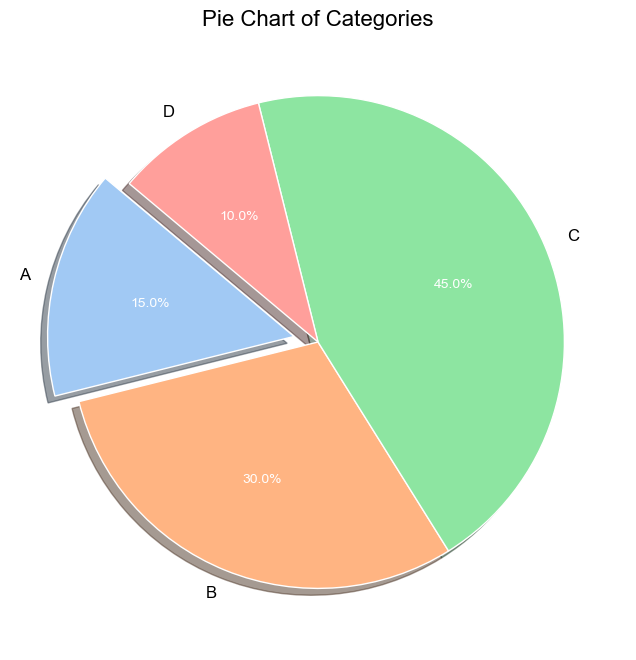

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [15, 30, 45, 10]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create pie chart using Matplotlib with Seaborn style
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    x=df['Values'],                   # The wedge sizes
    labels=df['Category'],            # The labels for each wedge
    colors=sns.color_palette('pastel'),  # Colors for each category
    autopct='%1.1f%%',                # Label wedges with numeric value
    startangle=140,                   # Start angle for the first wedge
    explode=(0.1, 0, 0, 0),           # Offset the first wedge
    shadow=True                       # Draw a shadow beneath the pie
)

# Customize text properties using Seaborn style
plt.setp(wedges, edgecolor='white')
plt.setp(autotexts, size=10, color='white')
plt.setp(texts, size=12, color='black')

# Add title
plt.title('Pie Chart of Categories', color='black', size=16)

# Show plot
plt.show()


# Exploring Relationships Between Variables


## Correlation

## What is Correlation?

Correlation measures the relationship between two variables, indicating how one variable changes in relation to the other. The correlation coefficient ranges from -1 to 1, where:
- **1**: Perfect positive correlation
- **0**: No correlation
- **-1**: Perfect negative correlation

### Key Components:
- **Correlation Coefficient (r)**: A numerical value that represents the strength and direction of the relationship between two variables.
- **Positive Correlation**: As one variable increases, the other variable also increases.
- **Negative Correlation**: As one variable increases, the other variable decreases.
- **No Correlation**: There is no relationship between the changes in the two variables.

## Why Use Correlation?

- **Identify Relationships**: Determine the strength and direction of the relationship between variables.
- **Predict Outcomes**: Use the relationship to predict values of one variable based on another.
- **Feature Selection**: Identify important features in a dataset for machine learning models.

## Seaborn `heatmap`

[Seaborn `heatmap` Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

The `heatmap` function in Seaborn is a powerful tool for visualizing the correlation matrix of a dataset. This function can be used to create a heatmap that shows the correlation coefficients between variables.

### What is a Heatmap?

A heatmap is a data visualization technique that uses color to represent the values of a matrix. It is particularly useful for displaying the correlation matrix of a dataset, where each cell in the matrix shows the correlation coefficient between two variables.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data, **kwargs)
plt.show()
```

### Applications of Heatmap
One of the main applications of a heatmap is to show the correlation matrix of a dataset. By visualizing the correlation coefficients, we can quickly identify which variables are positively or negatively correlated and the strength of these correlations.

## Pandas `.corr()` Method
The Pandas library provides the `.corr()` method to calculate the correlation matrix of a DataFrame. This method can compute several types of correlation coefficients, including Pearson, Spearman, and Kendall.


```python
import pandas as pd

correlation_matrix = df.corr(method='pearson')  # Default is 'pearson'
```

### Types of Correlation
- **Pearson Correlation**: Measures the linear relationship between two variables. It assumes that the data is normally distributed and is sensitive to outliers.
- **Spearman Correlation**: A rank-based correlation that measures the monotonic relationship between two variables. It does not assume a linear relationship and is less sensitive to outliers.
- **Kendall Correlation**: Another rank-based correlation that measures the ordinal association between two variables. It is more robust to outliers than Pearson correlation.


### Key Parameters

- **`data`**: A rectangular dataset to plot. It can be a DataFrame or an array.
- **`annot`**: If `True`, write the data value in each cell.
- **`fmt`**: String formatting code to use when adding annotations.
- **`cmap`**: The mapping from data values to color space.
- **`vmin`, `vmax`**: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
- **`center`**: The value at which to center the colormap when plotting divergent data.
- **`linewidths`**: Width of the lines that will divide each cell.


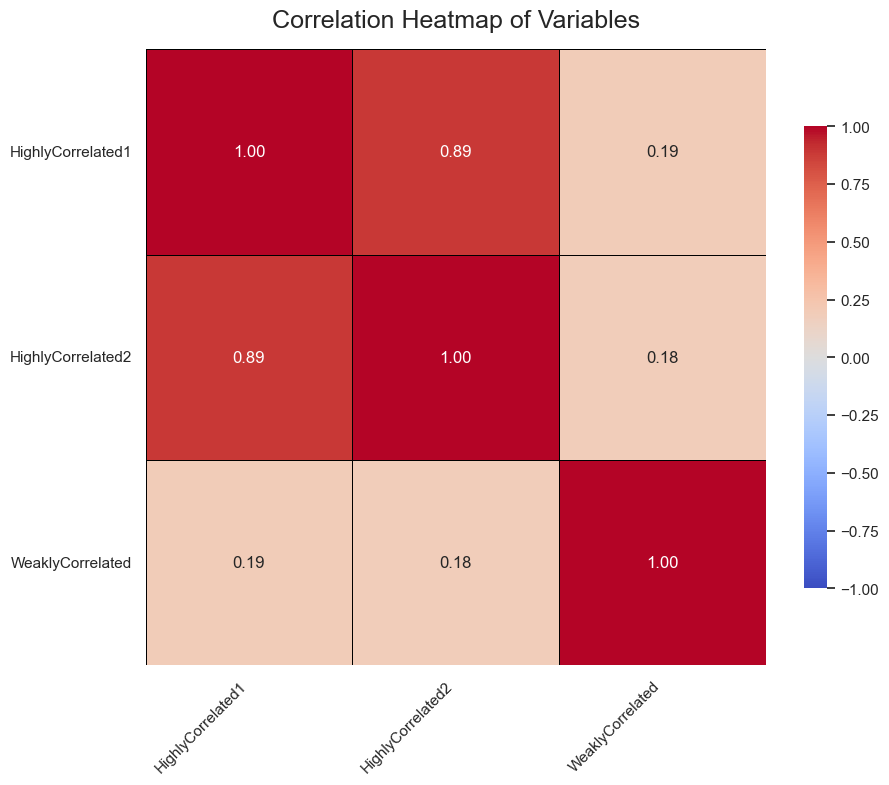

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'HighlyCorrelated1': np.random.normal(loc=50, scale=10, size=100),
    'HighlyCorrelated2': np.random.normal(loc=50, scale=10, size=100),
    'WeaklyCorrelated': np.random.normal(loc=50, scale=10, size=100)
}

# Introduce high correlation
data['HighlyCorrelated2'] = data['HighlyCorrelated1'] + np.random.normal(loc=0, scale=5, size=100)

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    data=correlation_matrix,          # The correlation matrix
    annot=True,                       # Annotate cells with correlation coefficients
    fmt='.2f',                        # Format of the annotation text
    cmap='coolwarm',                     # Color map to use
    vmin=-1, vmax=1,                  # Values to anchor the colormap
    center=0,                         # Center of the colormap
    linewidths=0.5,                   # Width of the lines that divide each cell
    linecolor='black',                # Color of the lines that divide each cell
    cbar_kws={'shrink': 0.75}         # Color bar settings
)

# Customize the heatmap for better aesthetics
heatmap.set_title('Correlation Heatmap of Variables', fontdict={'fontsize': 18}, pad=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Show plot
plt.show()


## Scatter Plots

## What is a Scatter Plot?

A scatter plot is a type of data visualization that displays individual data points plotted as dots on a Cartesian coordinate system. Each dot represents a pair of values from two numerical variables. Scatter plots are useful for identifying relationships, patterns, and trends between the variables.


## Why Use Scatter Plots?

- **Identify Relationships**: Visualize the relationship between two numerical variables.
- **Detect Patterns**: Detect patterns, trends, and clusters in the data.
- **Spot Outliers**: Identify outliers and anomalies in the data.
- **Correlation**: Assess the correlation between variables.

## Seaborn `scatterplot`

[Seaborn `scatterplot` Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

The `scatterplot` function in Seaborn is a powerful tool for creating scatter plots with a variety of customization options. This function can be used to visualize the relationship between two numerical variables.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data, **kwargs)
plt.show()
```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It can be a DataFrame, Series, array, or list.
- **`x`**: The name of the variable to be plotted on the x-axis.
- **`y`**: The name of the variable to be plotted on the y-axis.
- **`hue`**: Grouping variable that will produce points with different colors.
- **`style`**: Grouping variable that will produce points with different markers.
- **`size`**: Grouping variable that will produce points with different sizes.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`sizes`**: A dictionary mapping sizes to different levels of the size variable.
- **`markers`**: A dictionary mapping markers to different levels of the style variable.


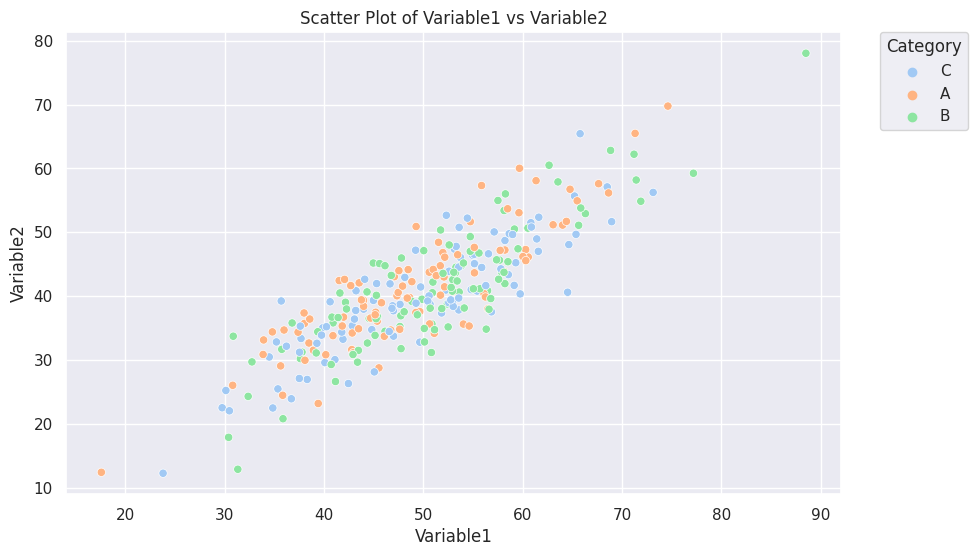

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more correlation and density
data = {
    'Variable1': np.random.normal(loc=50, scale=10, size=300),
    'Variable2': np.random.normal(loc=50, scale=10, size=300),
    'Category': np.random.choice(['A', 'B', 'C'], size=300)
}

data['Variable2'] = data['Variable1'] * 0.8 + np.random.normal(loc=0, scale=5, size=300)

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='Variable1',
    y='Variable2',
    hue='Category',
    palette='pastel'
)

# Improve legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add title and labels
plt.title('Scatter Plot of Variable1 vs Variable2')
plt.xlabel('Variable1')
plt.ylabel('Variable2')

# Show plot
plt.show()


## Hexagonal Binning

## What is Hexagonal Binning?

Hexagonal binning is a technique for visualizing the relationship between two numerical variables when you have a large number of data points. Instead of plotting each point individually, the data space is divided into hexagonal bins, and the count of data points in each bin is represented by the color or shading of the hexagon.

### Key Components:
- **Hexagons**: Each hexagon represents a bin containing a count of data points.
- **Color/Shading**: The color or shading of each hexagon represents the density of data points in that bin.

## Why Use Hexagonal Binning?

- **Handle Large Datasets**: Effectively visualize large datasets without overplotting.
- **Identify Patterns**: Easily identify patterns, trends, and clusters in the data.
- **Density Visualization**: Visualize the density of data points in different regions of the data space.

## Seaborn `jointplot` with Hexagonal Binning

[Seaborn `jointplot` Documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

The `jointplot` function in Seaborn is a powerful tool for creating hexagonal binning plots with marginal histograms. This function can be used to visualize the density of data points in a two-dimensional space along with the distributions of the individual variables.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x, y, kind='hex', **kwargs)
plt.show()
```

### Key Parameters

- **`x`**: The x coordinates of the data points.
- **`y`**: The y coordinates of the data points.
- **`gridsize`**: The number of hexagons in the x direction.
- **`cmap`**: The colormap for the hexagons.
- **`mincnt`**: If not `None`, only show cells with more than `mincnt` number of points in the bin.
- **`reduce_C_function`**: A function that reduces the values in the bins to a single number.
- **`extent`**: Limits of the bins.


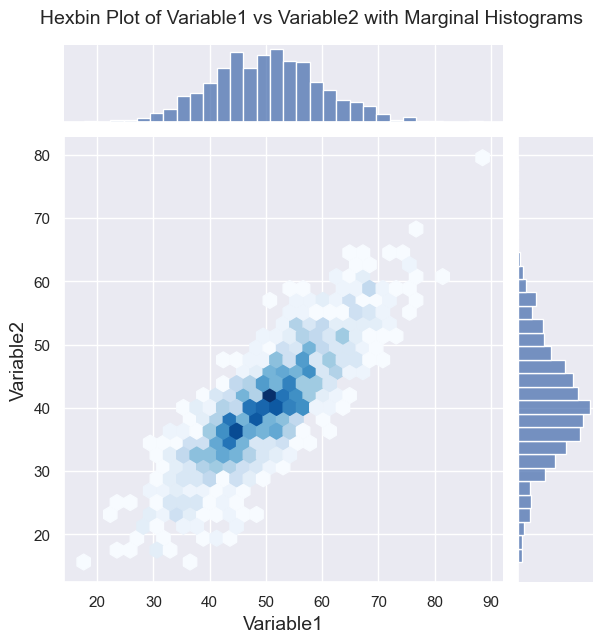

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
x = np.random.normal(loc=50, scale=10, size=1000)
y = x * 0.8 + np.random.normal(loc=0, scale=5, size=1000)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create hexbin plot with marginal histograms
g = sns.jointplot(
    x=x, y=y, kind='hex', gridsize=30, cmap='Blues', mincnt=1, marginal_kws=dict(bins=30, fill=True)
)

# Add title and labels
g.set_axis_labels('Variable1', 'Variable2', fontsize=14)
plt.suptitle('Hexbin Plot of Variable1 vs Variable2 with Marginal Histograms', y=1.03, fontsize=14)
plt.show()


## Contour Plots

## What is a Contour Plot?

A contour plot is a graphical representation that shows the 3D surface on a 2D plane using contour lines. Each contour line represents a constant value. Contour plots are useful for visualizing the relationship between three continuous variables, typically two independent variables and one dependent variable.

## Why Use Contour Plots?

- **Visualize 3D Relationships**: Represent a three-dimensional relationship on a two-dimensional plane.
- **Identify Peaks and Valleys**: Easily identify peaks, valleys, and ridges in the data.
- **Density Visualization**: Visualize the density or concentration of data points in different regions.

## Seaborn `kdeplot`

[Seaborn `kdeplot` Documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

The `kdeplot` function in Seaborn can be used to create contour plots. This function can be used to visualize the probability density of two continuous variables.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x, y, **kwargs)
plt.show()
```

### Key Parameters

- **`x`**: The x coordinates of the data points.
- **`y`**: The y coordinates of the data points.
- **`shade`**: If `True`, shade in the area under the KDE curve.
- **`cmap`**: The colormap for the contours.
- **`n_levels`**: Number of contour levels to draw.
- **`thresh`**: Density threshold for contour plot.
- **`bw_adjust`**: Factor that adjusts the bandwidth of the KDE.
- **`gridsize`**: Number of points on each dimension of the evaluation grid.


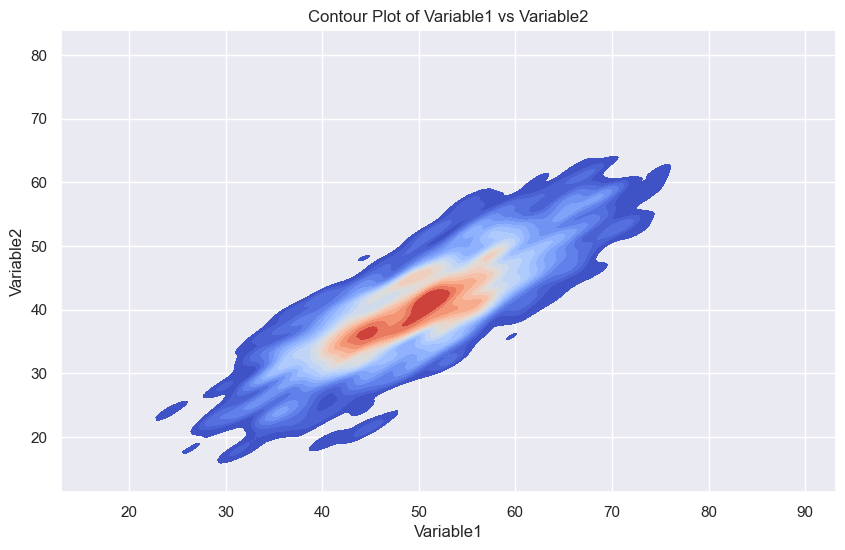

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
x = np.random.normal(loc=50, scale=10, size=1000)
y = x * 0.8 + np.random.normal(loc=0, scale=5, size=1000)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create contour plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=x,
    y=y,
    shade=True,
    cmap='coolwarm',
    n_levels=20,
    thresh=0.05,
    bw_adjust=0.5
)

# Add title and labels
plt.title('Contour Plot of Variable1 vs Variable2')
plt.xlabel('Variable1')
plt.ylabel('Variable2')

# Show plot
plt.show()


## Pair Plots

## What is a Pair Plot?

A pair plot is a matrix of scatter plots that shows the relationships between multiple pairs of variables in a dataset. Each scatter plot in the matrix represents a pair of variables, and the diagonal plots typically show the distribution of individual variables.

## Why Use Pair Plots?

- **Explore Relationships**: Visualize the relationships between multiple pairs of variables.
- **Identify Patterns**: Detect patterns, trends, and clusters in the data.
- **Spot Outliers**: Identify outliers and anomalies in the data.
- **Comprehensive Visualization**: Provide a comprehensive overview of the relationships in the dataset.

## Seaborn `pairplot`

[Seaborn `pairplot` Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

The `pairplot` function in Seaborn is a powerful tool for creating pair plots with a variety of customization options. This function can be used to visualize the relationships between multiple pairs of variables.

### Basic Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, **kwargs)
plt.show()
```

### Key Parameters

- **`data`**: The dataset containing the variables to be plotted. It should be a DataFrame.
- **`hue`**: Grouping variable that will produce points with different colors.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`diag_kind`**: Kind of plot for the diagonal subplots ('auto', 'hist', 'kde').
- **`markers`**: Markers for the different levels of the hue variable.
- **`kind`**: Kind of plot for the non-diagonal subplots ('scatter', 'reg').
- **`corner`**: If `True`, don't add axes to the upper triangle of the grid, making this a corner plot.


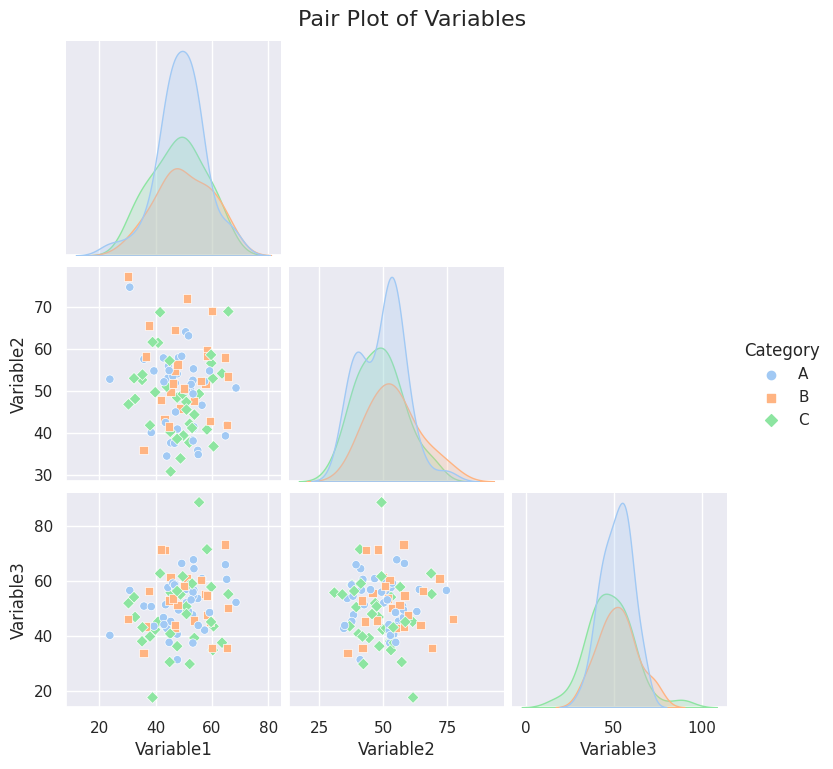

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Variable1': np.random.normal(loc=50, scale=10, size=100),
    'Variable2': np.random.normal(loc=50, scale=10, size=100),
    'Variable3': np.random.normal(loc=50, scale=10, size=100),
    'Category': np.random.choice(['A', 'B', 'C'], size=100)
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create pair plot
pair_plot = sns.pairplot(
    data=df,
    hue='Category',
    palette='pastel',
    diag_kind='kde',
    markers=['o', 's', 'D'],
    corner=True
)

# Add title
pair_plot.fig.suptitle('Pair Plot of Variables', y=1.02, fontsize=16)

# Show plot
plt.show()


# Comparing Categorical and Numerical Data


## Box Plots and Violin Plots

## What are Box Plots and Violin Plots?

### Box Plots

A box plot, also known as a whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Box plots can also highlight outliers.

### Key Components of Box Plots:
- **Box**: Represents the interquartile range (IQR) from Q1 to Q3.
- **Whiskers**: Extend from the box to the minimum and maximum values within 1.5 * IQR from Q1 and Q3, respectively.
- **Median Line**: A line inside the box indicating the median (Q2).
- **Outliers**: Data points outside the whiskers.

### Violin Plots

A violin plot combines the features of a box plot and a kernel density plot. It shows the distribution of the data across different categories. The width of the violin plot at different values represents the density of the data.

### Key Components of Violin Plots:
- **Violin Shape**: Represents the density of the data at different values.
- **Inner Box Plot**: Shows the summary statistics of the data similar to a box plot.
- **Width**: Indicates the density of the data.

## Why Use Box Plots and Violin Plots?

- **Compare Distributions**: Easily compare the distribution of numerical data across different categories.
- **Identify Outliers**: Detect outliers and understand their impact on the data.
- **Visualize Spread and Density**: See the spread, skewness, and density of the data at a glance.
- **Summarize Data**: Provide a summary of data with key statistical measures.

## Seaborn `boxplot` and `violinplot`

[Seaborn `boxplot` Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

[Seaborn `violinplot` Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

The `boxplot` and `violinplot` functions in Seaborn are powerful tools for creating box plots and violin plots with a variety of customization options. These functions can be used to visualize the distribution of numerical data across different categories.

### Basic Syntax for Box Plot

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data, **kwargs)
plt.show()
```
### Basic Syntax for Violin Plot

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data, **kwargs)
plt.show()
```

### Key Parameters for Both Plots

- **`data`**: The dataset containing the variables to be plotted. It should be a DataFrame.
- **`x`**: The name of the categorical variable to be plotted on the x-axis.
- **`y`**: The name of the numerical variable to be plotted on the y-axis.
- **`hue`**: Grouping variable that will produce points with different colors.
- **`palette`**: Colors to use for different levels of the hue variable.
- **`order`**: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
- **`width`**: Width of each box or violin.


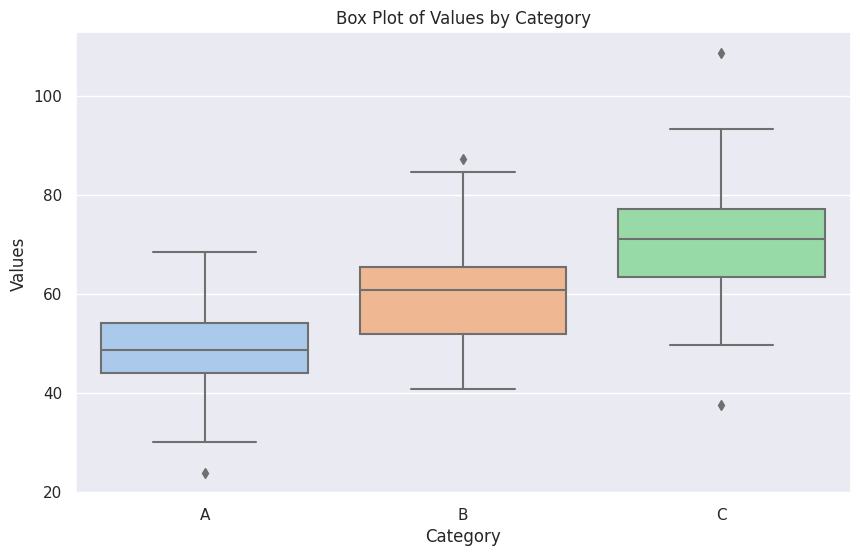

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Category': np.repeat(['A', 'B', 'C'], 100),
    'Values': np.concatenate([
        np.random.normal(loc=50, scale=10, size=100),
        np.random.normal(loc=60, scale=10, size=100),
        np.random.normal(loc=70, scale=10, size=100)
    ])
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Category',
    y='Values',
    palette='pastel'
)

# Add title and labels
plt.title('Box Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')

# Show plot
plt.show()


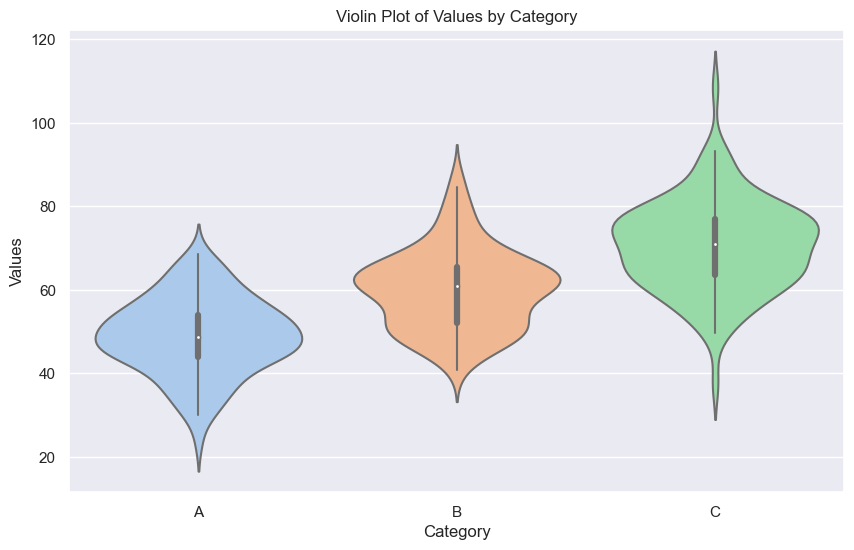

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Category': np.repeat(['A', 'B', 'C'], 100),
    'Values': np.concatenate([
        np.random.normal(loc=50, scale=10, size=100),
        np.random.normal(loc=60, scale=10, size=100),
        np.random.normal(loc=70, scale=10, size=100)
    ])
}

# Create DataFrame
df = pd.DataFrame(data)

# Set plot style using Seaborn
sns.set(style='darkgrid')

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='Category',
    y='Values',
    palette='pastel',
    inner='box',  # Include inner box plot to show summary statistics
    scale='width' # Use the same width for all violins
)

# Add title and labels
plt.title('Violin Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')

# Show plot
plt.show()
